In [4]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [22]:
PATH = "C:/Users/User/Desktop/"

train_df = pd.read_csv(PATH + "train-data.tsv", sep='\t', header= None)
test_df = pd.read_csv(PATH + "valid-data.tsv", sep= '\t', header= None)

train_df.columns = ["label", "text"]
test_df.columns = ["label", "text"]

print(train_file_path.shape)
print(test_file_path.shape)

(4179, 2)
(1392, 2)


In [21]:
train_file_path.tail(3)

,label,text
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...
4178,ham,tell my bad character which u dnt lik in me. ...


In [23]:
train_df.dropna()
train_df.shape

(4179, 2)

In [24]:
test_df.dropna()
test_df.shape

(1392, 2)

### Text Cleaning

In [31]:
# Remove number strings
train_df['text'] = train_df['text'].replace(r'\d+', 'NUM', regex=True)
test_df['text'] = test_df['text'].replace(r'\d+', 'NUM', regex=True)

train_df.head(5)

,label,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [35]:
import pandas as pd
import re
import string
import nltk

ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

# Text Cleaning 
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

clean_text(train_df['text'])
clean_text(test_df['text'])

train_df

,label,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need NUM arrange transport...
4176,spam,free entry into our £NUM weekly competition ju...
4177,spam,-pls stop bootydelious (NUM/f) is inviting you...


### Implementing RNN

In [36]:
X_train = train_df['text']
X_test = test_df['text']

y_train = np.where(train_df['label']=='spam', 1, 0)
y_test = np.where(test_df['label']=='spam', 1, 0)

In [64]:
X_test[0]

'i am in hospital da. . i will return home in evening'

In [38]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [56]:
print(tokenizer.index_word)

{1: 'num', 2: 'i', 3: 'to', 4: 'you', 5: 'a', 6: 'the', 7: 'u', 8: 'and', 9: 'in', 10: 'is', 11: 'me', 12: 'my', 13: 'for', 14: 'your', 15: 'it', 16: 'of', 17: 'call', 18: 'have', 19: 'on', 20: 'now', 21: 'that', 22: 'are', 23: 'so', 24: 'but', 25: 'not', 26: 'or', 27: 'do', 28: 'at', 29: 'can', 30: "i'm", 31: 'will', 32: 'be', 33: 'with', 34: 'if', 35: 'get', 36: 'just', 37: 'ur', 38: 'no', 39: 'this', 40: 'we', 41: 'gt', 42: 'lt', 43: 'up', 44: 'ok', 45: 'go', 46: 'free', 47: 'when', 48: 'how', 49: 'out', 50: '£num', 51: 'all', 52: 'from', 53: 'what', 54: 'know', 55: 'like', 56: 'then', 57: 'good', 58: 'got', 59: 'come', 60: 'its', 61: 'time', 62: 'day', 63: 'only', 64: 'am', 65: 'was', 66: 'he', 67: 'love', 68: 'send', 69: 'there', 70: 'as', 71: 'text', 72: 'txt', 73: 'want', 74: 'going', 75: 'one', 76: 'by', 77: 'ü', 78: 'about', 79: 'need', 80: 'still', 81: 'lor', 82: 'n', 83: 'r', 84: "i'll", 85: 'home', 86: 'our', 87: 'stop', 88: 'she', 89: 'see', 90: 'today', 91: 'sorry', 92: '

In [39]:
# assign an integer to each word 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [40]:
from keras.preprocessing.sequence import pad_sequences

X_train_seq_padded = pad_sequences(X_train_seq, maxlen = 50)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen = 50)

In [91]:
X_train_seq_padded

array([[   0,    0,    0, ...,   43,   13,   15],
       [   0,    0,    0, ...,  275,   27,  333],
       [   0,    0,    0, ..., 3426,  425,  526],
       ...,
       [   0,    0,    0, ..., 3353,  218,  190],
       [   0,    0,    0, ...,  726,    3,    1],
       [   0,    0,    0, ..., 7080,   57,  179]])

In [41]:
# Building Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          226592    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 236,001
Trainable params: 236,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'] )

In [43]:
model_history = model.fit(X_train_seq_padded, 
                          y_train,
                          batch_size=32, 
                          epochs=20,
                          validation_data=(X_test_seq_padded, y_test))

Epoch 1/20
131/131 [==============================] - 18s 30ms/step - loss: 0.4450 - accuracy: 0.8602 - val_loss: 0.0729 - val_accuracy: 0.9741
Epoch 2/20
131/131 [==============================] - 2s 13ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 0.0434 - val_accuracy: 0.9835
Epoch 3/20
131/131 [==============================] - 2s 13ms/step - loss: 0.0174 - accuracy: 0.9959 - val_loss: 0.0383 - val_accuracy: 0.9885
Epoch 4/20
131/131 [==============================] - 2s 13ms/step - loss: 0.0124 - accuracy: 0.9977 - val_loss: 0.0418 - val_accuracy: 0.9871
Epoch 5/20
131/131 [==============================] - 2s 13ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 6/20
131/131 [==============================] - 2s 13ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0462 - val_accuracy: 0.9878
Epoch 7/20
131/131 [==============================] - 2s 13ms/step - loss: 3.7726e-04 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0

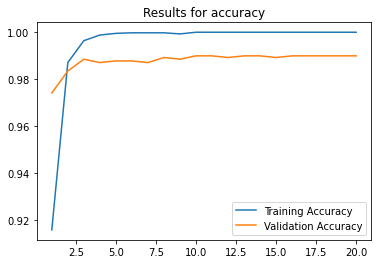

In [44]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_{}'.format('accuracy')]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Results for {}'.format('accuracy'))
plt.legend()
plt.show()

In [77]:
model.predict([3865])

array([[0.31627744]], dtype=float32)

Okay I think I fucked up this step. The main issue is that before padding each text sequences, we had transformed our text data to be represented by integers. As a result, it is the integer data that was used during the fitting process, which subsequently means our predict function only accepts integer inputs. 

### Quick fix

In [96]:
def preprocess_it(text):
    clean = text.apply(lambda x: clean_text(x))
    tokened = tokenizer.texts_to_sequences(clean)
    padded = pad_sequences(tokened, maxlen=50)
    return padded

In [101]:
model.predict(preprocess_it(pd.Series(['you have won £1000 cash! call to claim your prize.'])))[0][0]

0.99940836

## Predict!

In [105]:
def predict_message(pred_text):
    
    def preprocess_it(text):
        clean = text.apply(lambda x: clean_text(x))
        tokened = tokenizer.texts_to_sequences(clean)
        padded = pad_sequences(tokened, maxlen=50)
        return padded
    
    prediction = model.predict(
        preprocess_it( pd.Series([pred_text]) )
    )
    prediction = prediction[0][0]
    print(prediction)
    return [prediction, "ham" if prediction <0.5 else "spam"]

pred_text = "how are you doing today?"
prediction = predict_message(pred_text)
print(prediction)

0.00015029311
[0.00015029311, 'ham']


In [106]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
    test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460 4",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
    passed = True

    for msg, ans in zip(test_messages, test_answers):
        prediction = predict_message(msg)
    
    if prediction[1] != ans:
        passed = False

    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")

test_predictions()

0.00015029311
0.9959926
8.319138e-06
0.5814633
0.99940836
3.6685637e-05
5.6207873e-06
You passed the challenge. Great job!
